In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import markov_clustering as mc
import networkx as nx

In [4]:
cluster_colors = [np.random.randint(64, 256, 3) for i in range(10000)]

In [16]:
for p in range(1, 301):
    print(p)
    nodes = pd.read_json(r"..\bin\Debug\netcoreapp2.2\maps2\prob-" + f"{p:03d}" + ".graph", orient='records', lines = True)
    nodes = nodes.sort_values('Id')
    nodes['cluster_0'] = nodes.Id
    edges = pd.DataFrame(np.repeat(nodes.Id, nodes.apply(lambda x: len(x.ConnectedIds), axis = 1)))
    edges['connectedId'] = np.concatenate(np.array(nodes.ConnectedIds))
    
    clusters_count = 6
    j=1
    while clusters_count > 5:
        old_cluster_field = f"cluster_{j-1}"
        new_cluster_field = f"cluster_{j}"

        id_nodes = nodes.set_index('Id')
        edges['cluster1'] = np.array(id_nodes.loc[edges.Id][old_cluster_field])
        edges['cluster2'] = np.array(id_nodes.loc[edges.connectedId][old_cluster_field])

        edges_strength=edges.groupby(['cluster1', 'cluster2']).size().reset_index()
        edges_strength=edges_strength[edges_strength.cluster1 != edges_strength.cluster2]

        graph = nx.Graph()
        graph.add_weighted_edges_from(edges_strength.apply(lambda x: (x.cluster1, x.cluster2,1), axis = 1))

        matrix = nx.adjacency_matrix(graph, nodelist=np.arange(0, nodes[old_cluster_field].max() + 1))
        result = mc.run_mcl(matrix, inflation=2, expansion=2, iterations=100)
        clusters = mc.get_clusters(result)
        clusters_count = (len(clusters))
        print("\t"+str(clusters_count))
        nodes_clusters = np.zeros(nodes[old_cluster_field].max() + 1, dtype=int)

        for i in range(len(clusters)):
            nodes_clusters[list(clusters[i])] = i
        nodes[new_cluster_field] = nodes[old_cluster_field].map(lambda x: nodes_clusters[x])
        nodes[new_cluster_field+'_color'] = nodes[new_cluster_field].map(lambda i: cluster_colors[i])

        j += 1
    
    clusters_columns = [col for col in nodes.filter(like = 'cluster_').columns if not 'color' in col][1:]
    nodes['cluster_hierarchy'] = nodes.apply(lambda x: [x[c] for c in clusters_columns],axis = 1)
    nodes[['Id', 'X', 'Y', 'cluster_hierarchy', 'ConnectedIds']].to_json(r"..\bin\Debug\netcoreapp2.2\clusters.v2\prob-" + str(p) + ".clusters", orient='records', lines = True)

1
	2
2
	67
	14
	6
	2
3
	36
	9
	2
4
	74
	15
	6
	2
5
	35
	8
	2
6
	23
	6
	2
7
	26
	6
	2
8
	33
	9
	4
9
	20
	5
10
	63
	17
	4
11
	51
	13
	6
	2
12
	51
	13
	5
13
	52
	16
	4
14
	48
	8
	3
15
	49
	12
	4
16
	52
	12
	4
17
	55
	14
	6
	3
18
	52
	12
	4
19
	48
	12
	4
20
	51
	14
	6
	2
21
	142
	34
	11
	3
22
	85
	20
	5
23
	133
	34
	12
	4
24
	127
	30
	10
	4
25
	86
	18
	5
26
	124
	38
	11
	5
27
	162
	34
	13
	5
28
	140
	29
	10
	4
29
	120
	26
	9
	3
30
	92
	25
	6
	3
31
	158
	41
	14
	5
32
	171
	37
	14
	6
	2
33
	135
	31
	9
	4
34
	143
	36
	12
	3
35
	125
	31
	12
	5
36
	78
	16
	4
37
	138
	30
	10
	4
38
	95
	24
	6
	2
39
	109
	22
	5
40
	147
	35
	10
	4
41
	137
	30
	9
	2
42
	131
	28
	9
	2
43
	141
	36
	12
	5
44
	140
	33
	11
	3
45
	138
	31
	9
	3
46
	111
	21
	6
	2
47
	109
	19
	5
48
	137
	32
	12
	3
49
	125
	29
	9
	2
50
	142
	32
	8
	3
51
	300
	69
	19
	4
52
	368
	79
	22
	6
	1
53
	370
	75
	23
	7
	2
54
	342
	67
	15
	4
55
	402
	79
	16
	4
56
	444
	89
	24
	6
	1
57
	425
	94
	26
	8
	1
58
	398
	80
	20
	6
	1
59
	407
	86
	22
	5
60
	273


KeyboardInterrupt: 

In [109]:
nodes = pd.read_json(r"..\bin\Debug\netcoreapp2.2\clusters.v2\prob-" + str(101) + ".clusters", orient='records', lines = True)

In [105]:
path = pd.read_csv(r"..\bin\Debug\netcoreapp2.2\pathes\prob-101", sep='\t', names=['x', 'y'])

In [106]:
nodes['cluster'] = nodes.apply(lambda x: x.cluster_hierarchy[0], axis = 1)
nodes['cluster_color'] = nodes.cluster.map(lambda x: cluster_colors[x])

In [107]:
plt.rcParams['figure.dpi']=200

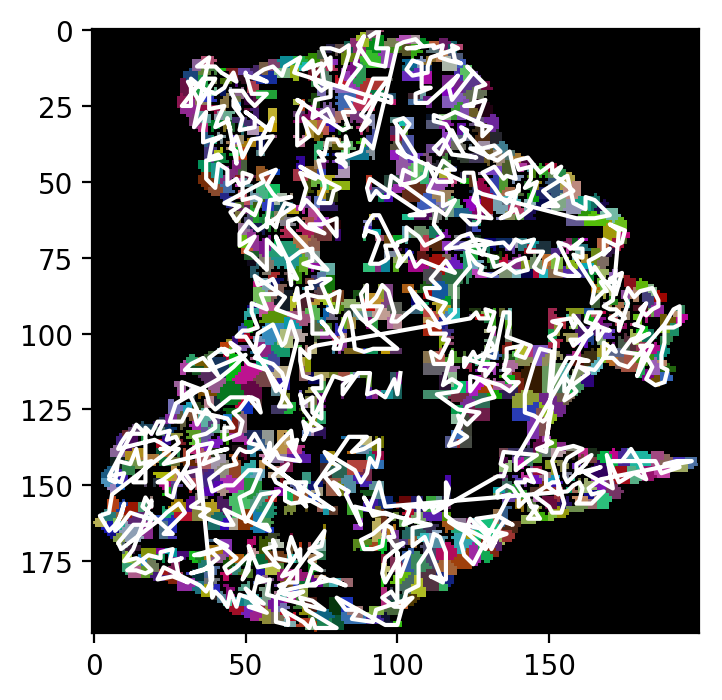

In [108]:
image = np.zeros((nodes.X.max() + 1, nodes.Y.max() + 1, 3))
for node in nodes.iterrows():
    image[node[1].X, node[1].Y] = node[1][f'cluster_color']
plt.imshow(image[:,:])
plt.plot(path.y, path.x, '-w')

In [71]:
edges = pd.DataFrame(np.repeat(nodes.Id, nodes.apply(lambda x: len(x.ConnectedIds), axis = 1)))
edges['connectedId'] = np.concatenate(nodes.ConnectedIds)

AttributeError: ("'Series' object has no attribute 'ConnectedIds'", 'occurred at index 0')

In [150]:
id_nodes = nodes.set_index('Id')
edges['cluster1'] = np.array(id_nodes.loc[edges.Id].cluster)
edges['cluster2'] = np.array(id_nodes.loc[edges.connectedId].cluster)
edges_strength=edges.groupby(['cluster1', 'cluster2']).size()

matrix = nx.adjacency_matrix(graph, nodelist=np.arange(0, nodes.cluster.max()+1))
result = mc.run_mcl(matrix, inflation=2, expansion=2, iterations=400)
clusters = mc.get_clusters(result) 

In [151]:
nodes_clusters = np.zeros(id_nodes.loc[edges.Id].cluster.max()+1, dtype=int)
for i in np.arange(len(clusters)):
    nodes_clusters[list(clusters[i])] = i

In [152]:
nodes['cluster_2'] = nodes.cluster.map(lambda i: nodes_clusters[i])
nodes['cluster_2_color'] = nodes.cluster_2.map(lambda i: cluster_colors[i])